# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [10]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
print(Boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html)) 

'medv' is Median value of owner-occupied homes in $1000s.
'dis' is weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?

The line of best fit (or trendline) is an educated guess about where a linear equation might fall in a set of data plotted on a scatter plot. Such that it minimizes the distance between itself and where observations fall in the data set

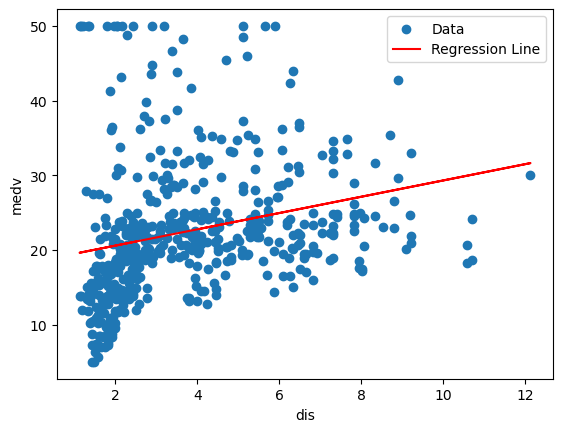

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

Null hypothesis: there is no linear relationship between dis and medv (the line has a slope of 0)
Alternate hypothesis : There is a linear relationship between dis and medv (The slope of line is not 0)

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [32]:
# Add your code here
X = sm.add_constant(dis)
Y = medv

model = sm.OLS(Y, X).fit()

print(model.summary())
print(model.conf_int())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:21:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
$B_0$ (intercept) 18.3901
$B_1$ (slope) 1.0916

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
$B_0$ : 0.817
$B_1$ : 0.188

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
$B_0$ : 16.784 , 19.996
$B_1$ : 0.722 1.462

In [5]:
# Your answer here
'''
(v) Co-eff   
$B_0$ (intercept) 18.3901
$B_1$ (slope) 1.0916

(vi) SE
$B_0$ : 0.817
$B_1$ : 0.188

(vii) CI
$B_0$ : 16.784 , 19.996
$B_1$ : 0.722 1.462
'''



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [6]:
# Your answer here 
'''
(viii) The R^2 values is 0.062, therefore it is not considered a good fit.

(ix) F-statistic is 33.58 and Prob (F-statistic) is 1.21e-08 with is lower than 0.05, therefor we will reject the null hypothesis and accept that there is non zero relationship between x and y


'''

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        18:15:44   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

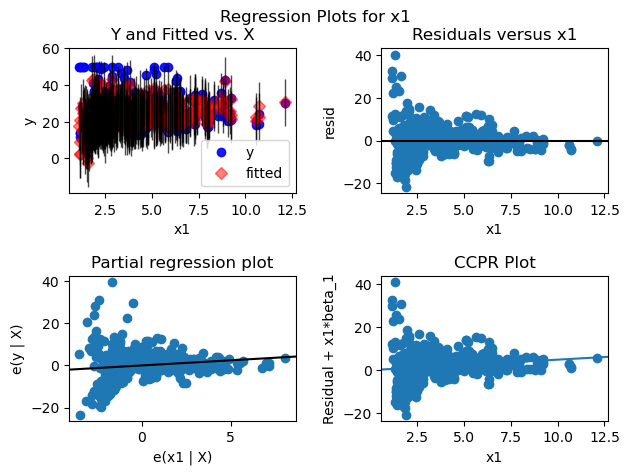

In [27]:
# Add your code here
X = Boston[['dis', 'rm']].values
X = sm.add_constant(X)
Y = Boston['medv'].values

model = sm.OLS(Y, X).fit()
print(model.summary())


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

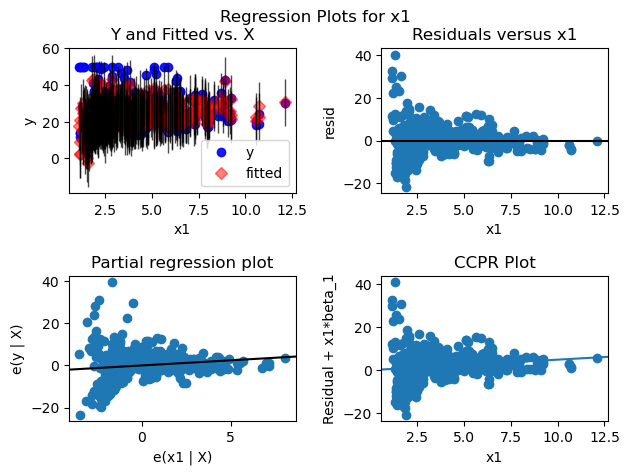

In [28]:
# Add your code here
'''
(ii)
Null : Both rm and dis are not predictive of mdev (zero slope both x1 and x2)
Alternative : Either rm or dis is predictive of mdev (aleast one slope is non zero)

(iii)
Both rm and dis are predictive of mdev as both p values are well below 0.05. 

(iv)
There are alot more blue dots(non-fitted medv) away from red diamonds(linear regression fitted mdev) at low x1 (dis), suggesting that bigger amount of outliers in the median home price at lower distance. 
This is also evident by Residual vs x1 plot where there is greater variance in Residuals at lower x1 (dis)
Outliers can disproportionately influence the model, making the regression line less accurate for the bulk of the data.
'''
fig = sm.graphics.plot_regress_exog(model, 'x1')
plt.show()


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [50]:
# Add your code here 
# Only looking for Intraction variable relation to medv while not controlling for the effects of 'dis' and 'rm'.
Boston['Interact']= Boston['dis'] * Boston['rm']
X = Boston['Interact']
X = sm.add_constant(X)
Y = Boston['medv']
interaction_model = sm.OLS(Y, X).fit()
print(interaction_model.summary())
print(model.conf_int())

# Interpretation 
# p-value associated with the F-statistic for the interaction term (Interact) is 5.03e-17 (which is very low), we reject the null hypothesis and conclude that there is a statistically significant interaction effect between the distance to employment centers (dis) and the average number of rooms per dwelling (rm) on the median home value (medv).



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     75.55
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           5.03e-17
Time:                        20:04:11   Log-Likelihood:                -1804.9
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8180      0.760     22.122      0.0

In [58]:
Boston['Interact']= Boston['dis'] * Boston['rm']
X = Boston[['dis', 'rm', 'Interact']].values
X = sm.add_constant(X)
Y = Boston['medv'].values
interaction_model = sm.OLS(Y, X).fit()
print(interaction_model.summary())

# Same interpretation as above just this model takes into the consideration the impact of rm and dis with the intreaction of two

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        20:20:14   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
